### Sentiment Analysis

In [12]:
# !pip install -qq transformers==4.18.0 -qq
# !pip install -qq torch

In [13]:
import torch
import pandas as pd
from tqdm import tqdm
from transformers import BertTokenizer

# load tokenizer
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
# load saved model
with open('src/model/bert_cpu.pkl' , 'rb') as f:
    model = torch.load(f)
f.close()

In [14]:
# Load dataset
loc = r'data/clean/tweet-minyak_goreng.csv'
df = pd.read_csv(loc, index_col=0, engine='python')
print(df.shape)
df.head(2)

(651, 6)


,id,date,username,tweet,tweet_clean,tweet_stem
0,1513509500489240582,2022-04-11 20:29:19,detikcom,KMHDI menyatakan sikapnya soal persoalan kelan...,kmhdi sikapnya kelangkaan minyak goreng wacana...,kmhdi sikap langka minyak goreng wacana jabat ...
1,1513453499098583041,2022-04-11 16:46:47,detikcom,Harga minyak goreng curah di Tasikmalaya masih...,harga minyak goreng curah tasikmalaya harga ec...,harga minyak goreng curah tasikmalaya harga ec...


In [15]:
def predict(text):
    subwords = tokenizer.encode(text)
    subwords = torch.LongTensor(subwords).view(1, -1).to('cpu')

    i2w = {0: 'positive', 1: 'neutral', 2: 'negative'}
    logits = model(subwords)[0]
    label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()
    return i2w[label]

tqdm.pandas()
df['sentiment'] = df.tweet_clean.progress_apply(predict)

100%|██████████| 651/651 [00:54<00:00, 11.86it/s]


negative     45
neutral     599
positive      7
Name: sentiment, dtype: int64


<AxesSubplot:>

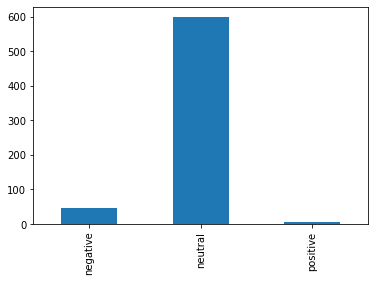

In [16]:
result = df.sentiment.value_counts().sort_index()
print(result)
result.plot(kind='bar')

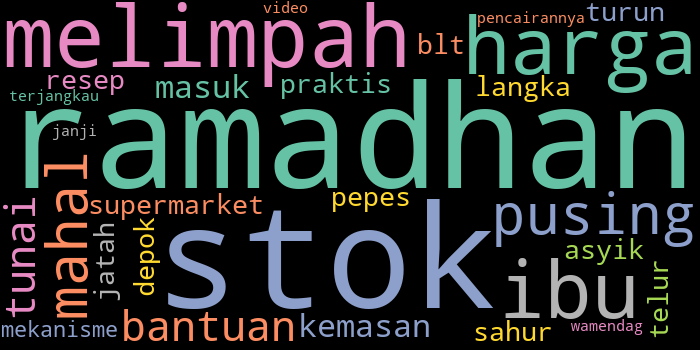

In [17]:
from utils.text import word_cloud
exc = ['minyak','goreng']
# Positive Tweet Wordcloud
word_cloud(df.tweet_clean.loc[df.sentiment=='positive'], background='black', exclusion=exc)

In [18]:
for i in df.tweet.loc[df.sentiment=='positive'].sample(3):
    print('-',i)

- Asyik Ibu-Ibu Dapat Jatah BLT Minyak Goreng, Ini Mekanisme Pencairannya!  https://t.co/rRoDfZPOEv
- VIDEO: Nggak Usah Pusing Minyak Goreng Mahal, Akan Ada Bantuan Tunai!  https://t.co/Apdwdin6Rm
- Nggak Usah Pusing Minyak Goreng Mahal, Akan Ada Bantuan Tunai!  https://t.co/gS2fgM5tsc


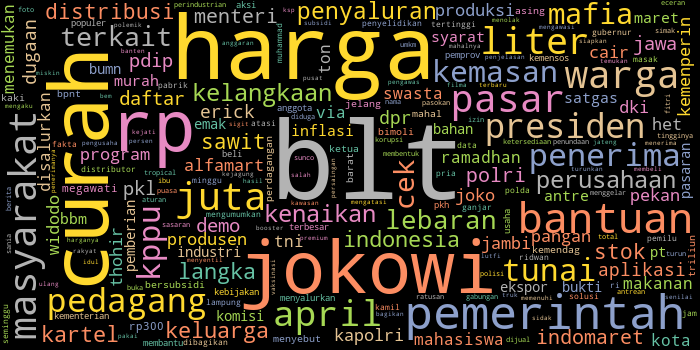

In [19]:
# Neutral Tweet Wordcloud
word_cloud(df.tweet_clean.loc[df.sentiment=='neutral'], background='black', exclusion=exc)

In [20]:
for i in df.tweet.loc[df.sentiment=='neutral'].sample(3):
    print('-',i)

- Pemerintah memutuskan untuk menyalurkan BLT atau Bantuan Langsung Tunai minyak goreng kepada masyarakat. Berikut ini syarat BLT minyak goreng.  https://t.co/COPj6t3RCC
- BLT Minyak Goreng, BLT UMKM, dan subsidi gaji alias Bantuan Subsidi Gaji (BSU) akan segera cari di bulan April 2022. Bagaimana cara mendapatkannya?  https://t.co/5YVKEM7ndJ
- BLT minyak goreng bisa digunakan untuk membeli barang lain, pemerintah pun membuka kemungkinan memperpanjang pemberian bantuan tersebut.  https://t.co/btc6mmM8D8


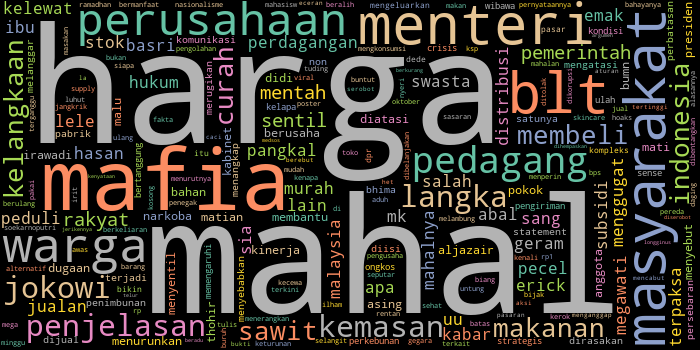

In [21]:
# Negative Tweet Wordcloud
word_cloud(df.tweet_clean.loc[df.sentiment=='negative'], background='black', exclusion=exc)

In [32]:
for i in df.tweet.loc[df.sentiment=='negative'].sample(3):
    print('-',i)

- Longginus mengatakan, stok telur dan minyak goreng mulai berkurang.  https://t.co/exC65lyGmi
- "Dugaan mafia minyak goreng dan lain-lain, yang sudah jelas tidak bisa diatasi apakah tidak membuat malu sang menteri?" kata Didi Irawadi.  https://t.co/OVnFtydYaH
- Stok Mulai Banyak, Kapan Harga Minyak Goreng Turun?  https://t.co/bNpdXYWFiC
